In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
from experiments import experiments_matching

_config = dict(m_sparse=5001, train_on_equal_cns=False, n_max=12, l_max=6)

def get_reg_results(n_train):
    experiments = experiments_matching(
        model_type='gpr', config=dict(n_train=n_train, **_config)
    )

    df = pd.DataFrame([{
        **exp['config'], 
        'train': exp['results']['testing']['train_set']['mae'],
        'test': exp['results']['testing']['test_set']['mae']
        } for exp in experiments
    ])
    return df.groupby(['noise']).mean()[['train', 'test']]\
        .reset_index().sort_values('noise')

get_reg_results(n_train=1_000)

/opt/miniconda3/envs/synth-exp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,noise,train,test
0,0.000100,0.000009,0.077307
1,0.000215,0.000028,0.077230
2,0.000463,0.000111,0.076887
3,0.001000,0.000475,0.075526
4,0.002150,0.001784,0.071707
5,0.004630,0.005155,0.065845
6,0.010000,0.011202,0.062003
7,0.021500,0.020108,0.062554
8,0.046300,0.033206,0.067777
9,0.100000,0.051969,0.079085


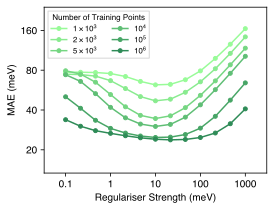

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
from experiments.plot import log_log, yticks, xticks
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'helvetica'
plt.rcParams["font.family"] = "helvetica"
import numpy as np

n_trains = {
    1_000: r'$1 \times 10^3$',
    2_000: r'$2 \times 10^3$',
    5_000: r'$5\times10^3$',
    10**4: r'$10^4$',
    10**5: r'$10^5$',
    10**6: r'$10^6$',
}
cmap = cm.get_cmap('plasma_r')(np.linspace(0.1, 0.8, len(n_trains)))

positions = np.linspace(0, 1, len(n_trains)) ** 1.2
cmap = LinearSegmentedColormap.from_list('mycmap', ["palegreen", "seagreen"])(positions)

plt.figure(dpi=200, figsize=(4, 3))

i = 0
for colour, (n_train, label) in zip(cmap, n_trains.items()):
    df = get_reg_results(n_train)
    plt.plot(df.noise * 1000, 1000 * df.test, marker='o', color=colour, label=label, markersize=4)

log_log()
yticks([10, 20, 40, 80, 160, 320])
xticks([0.1, 1, 10, 100, 1000])
s = 1.5
plt.ylim(bottom=20/s, top=160*s)
s = 3
plt.xlim(0.1/s, 1000*s)
plt.xlabel('Regulariser Strength (meV)')
plt.ylabel('MAE (meV)')

legend = plt.legend(ncol=2,title="Number of Training Points", fancybox=False,  prop={'size': 7.8});
plt.setp(legend.get_title(),fontsize='8')

plt.savefig("gpr-reg.png", bbox_inches="tight", dpi=200)